In [5]:
# 라이브러리 import

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [6]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [108]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [109]:
X_train.shape

(60000, 28, 28)

In [95]:
Y_train[0]

5

In [58]:
def count_number(data):
    cnt = [0 for _ in range(10)]

    for y in data:
        for num in range(10):
            if y == num:
                cnt[num] += 1
                break
    
    return cnt

In [60]:
num_train = count_number(Y_train)
num_test = count_number(Y_test)

print(num_train)
print(num_test)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


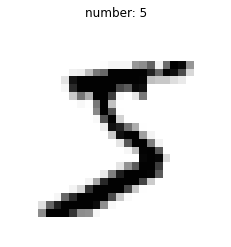

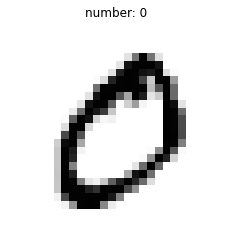

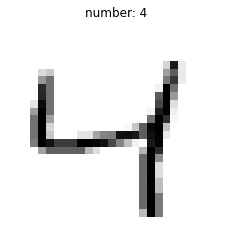

In [42]:
for i in range(3):
    plt.title('number: ' + str(Y_train[i]))
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.show()

In [69]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255   # 정규화
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = utils.to_categorical(Y_train, 10)  # 원핫인코딩
Y_test = utils.to_categorical(Y_test, 10)

In [72]:
print(Y_train[0])  # 5
print(Y_test[0])   # 7

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [76]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [77]:
# 위와 동일
model = Sequential([Dense(512, input_dim=784, activation='relu'),
                    Dense(10, activation='softmax')])

In [78]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


Epoch 00001: val_loss improved from inf to 0.14750, saving model to ./model\01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14750 to 0.10164, saving model to ./model\02-0.1016.hdf5

Epoch 00003: val_loss improved from 0.10164 to 0.08802, saving model to ./model\03-0.0880.hdf5

Epoch 00004: val_loss improved from 0.08802 to 0.07505, saving model to ./model\04-0.0751.hdf5

Epoch 00005: val_loss did not improve from 0.07505

Epoch 00006: val_loss improved from 0.07505 to 0.06421, saving model to ./model\06-0.0642.hdf5

Epoch 00007: val_loss did not improve from 0.06421

Epoch 00008: val_loss did not improve from 0.06421

Epoch 00009: val_loss improved from 0.06421 to 0.06315, saving model to ./model\09-0.0632.hdf5

Epoch 00010: val_loss did not improve from 0.06315

Epoch 00011: val_loss did not improve from 0.06315

Epoch 00012: val_loss did not improve from 0.06315

Epoch 00013: val_loss did not improve from 0.06315

Epoch 00014: val_loss did not improve from 0.06315

Epoch 00015

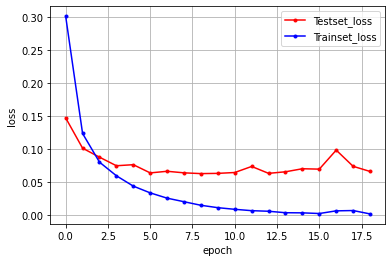

In [79]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- hdf5는 weight와 bias만 가지고 있고,
- h5는 input, output에 대한 정보도 모두 가지고 있음

In [80]:
model.save('./model/my_model_mnist.h5')

In [81]:
model.save('./model/my_model_mnist.hdf5')

# 나의 손글씨로 테스트

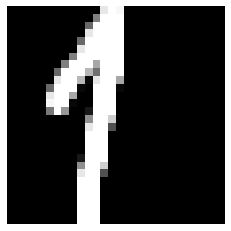

In [113]:
import matplotlib.pyplot as plt

my = plt.imread('./model/numbers/1.bmp')
# my = plt.resize(my, 28*28)
plt.imshow(my)
plt.axis('off')
plt.show()

In [149]:
my11 = plt.resize(my, 28*28)

AttributeError: module 'matplotlib.pyplot' has no attribute 'resize'

In [114]:
my.shape

(28, 28, 3)

In [125]:
import pandas as pd

pd.set_option('display.max_columns', None)

tmp = my[:,:,0]
df_tmp = pd.DataFrame(tmp)
print(tmp.shape)
df_tmp

(28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,231,255,247,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,104,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,231,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,104,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,231,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,128,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,128,255,255,255,167,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,104,255,255,255,183,112,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,231,255,255,183,8,231,255,255,167,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
# rgb 비교
import numpy as np

r = my[:,:,0]
g = my[:,:,1]
b = my[:,:,2]
arr_tmp = np.zeros_like(r)

In [131]:
my1 = tmp.reshape(1, -1).astype('float32') / 255

In [133]:
my1.shape

(1, 784)

In [88]:
import tensorflow as tf

model = tf.keras.models.load_model('./model/my_model_mnist.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# 예측

In [138]:
model.predict(my1)

array([[3.3163393e-04, 5.7386280e-11, 4.7746290e-02, 1.4512813e-08,
        3.4470607e-21, 5.1265433e-06, 1.6184579e-06, 2.7594059e-08,
        9.5191532e-01, 2.0739147e-11]], dtype=float32)

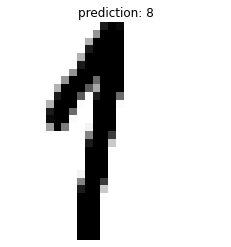

In [148]:
plt.title('prediction: ' + str(np.argmax(model.predict(my1))))
plt.imshow(my[:,:,0], cmap='Greys')
plt.axis('off')
plt.show()